In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D , Flatten ,Dense ,MaxPool2D ,GlobalAveragePooling2D ,Dropout

import splitfolders
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG19

from tensorflow.keras.models import Model
from tensorflow.keras import layers , models

In [3]:
os.listdir("/kaggle/input/fruits/fruits-360_dataset_original-size")

['fruits-360-original-size']

In [4]:
os.listdir("/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size")

['Meta', 'Papers', 'Validation', 'Training', 'readme.md', 'Test']

In [5]:
os.listdir("/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training")

['apple_red_delicios_1',
 'cucumber_3',
 'apple_red_1',
 'apple_red_yellow_1',
 'apple_crimson_snow_1',
 'eggplant_long_1',
 'zucchini_dark_1',
 'cabbage_white_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_6',
 'apple_golden_1',
 'apple_pink_lady_1',
 'apple_braeburn_1',
 'pear_3',
 'apple_hit_1',
 'apple_red_2',
 'pear_1',
 'apple_rotten_1',
 'apple_granny_smith_1',
 'apple_red_3',
 'carrot_1',
 'zucchini_1',
 'cucumber_1']

In [6]:
path="/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training"

for folder in os.listdir(path):
    folder_path=os.path.join(path,folder)
    if os.path.isdir(folder_path):
        list_of_elements=os.listdir(os.path.join(path,folder))
        
        print(f"folder:{folder}")
        print(f"number of elements:{len(list_of_elements)}")
        print("*********************")
        
    else:
        print(f"{folder_path} is not a directory")

folder:apple_red_delicios_1
number of elements:300
*********************
folder:cucumber_3
number of elements:163
*********************
folder:apple_red_1
number of elements:309
*********************
folder:apple_red_yellow_1
number of elements:308
*********************
folder:apple_crimson_snow_1
number of elements:318
*********************
folder:eggplant_long_1
number of elements:160
*********************
folder:zucchini_dark_1
number of elements:160
*********************
folder:cabbage_white_1
number of elements:96
*********************
folder:apple_golden_2
number of elements:308
*********************
folder:apple_golden_3
number of elements:316
*********************
folder:apple_6
number of elements:315
*********************
folder:apple_golden_1
number of elements:308
*********************
folder:apple_pink_lady_1
number of elements:313
*********************
folder:apple_braeburn_1
number of elements:320
*********************
folder:pear_3
number of elements:144
****************

In [7]:
cabbage_white_1="/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training/cabbage_white_1"
eggplant_long_1="/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training/eggplant_long_1"
apple_rotten_1="/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_rotten_1"
zucchini_dark_1="/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training/zucchini_dark_1"

In [8]:
def plot_imgs(item_dir,num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files=[os.path.join(item_dir,file) for file in all_item_dirs][:num_imgs]
    
    plt.figure(figsize=(10,10))
    for idx,img_path in enumerate (item_files):
        plt.subplot(5,5,idx+1)
        img=plt.imread(img_path)
        plt.imshow(img)
        
    plt.tight_layout()

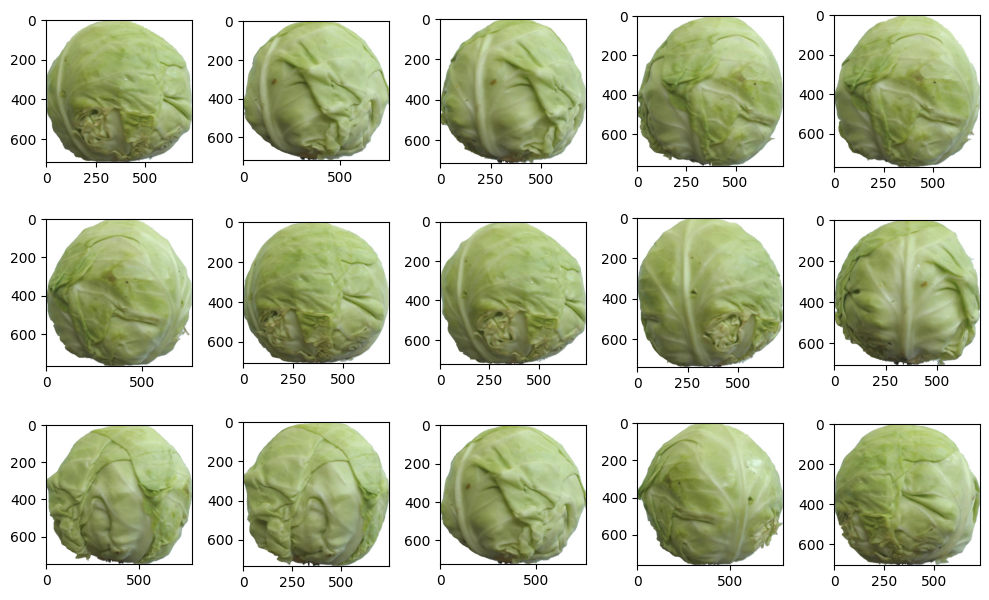

In [9]:
plot_imgs(cabbage_white_1,15)

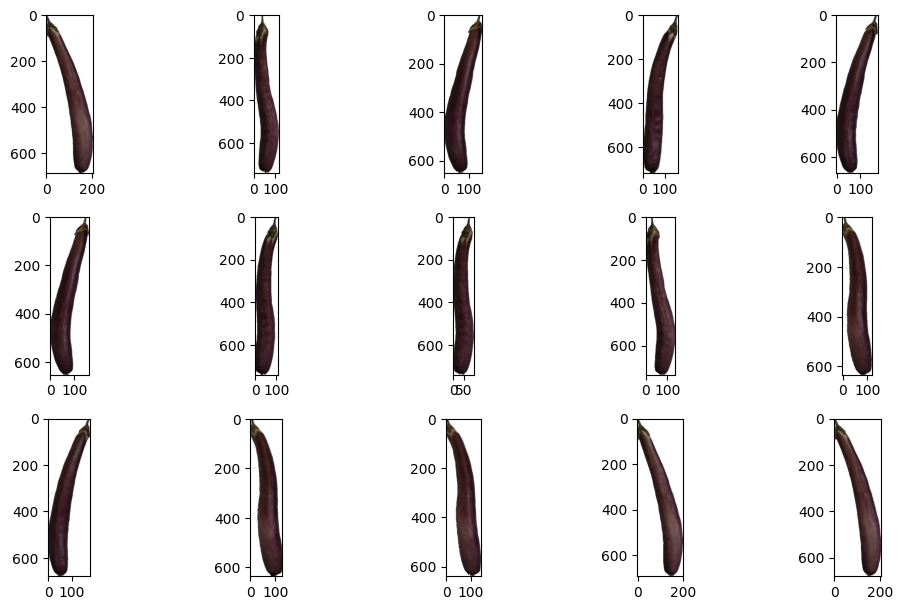

In [10]:
plot_imgs(eggplant_long_1,15)

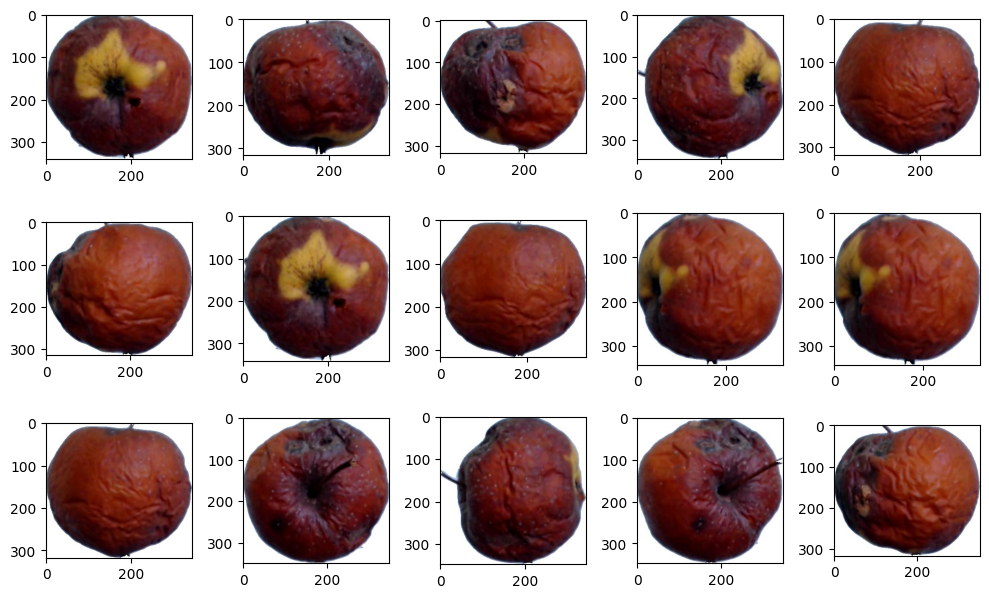

In [11]:
plot_imgs(apple_rotten_1,15)

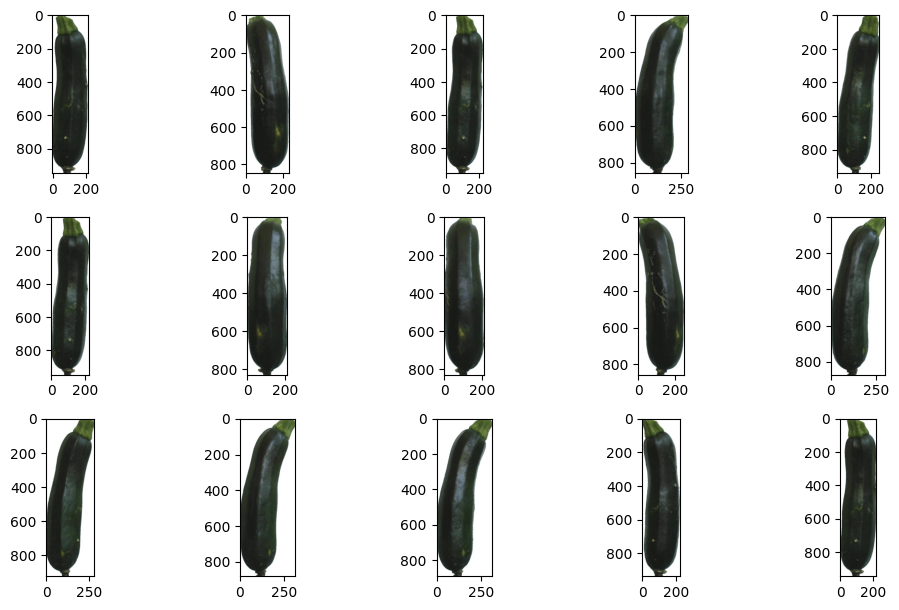

In [12]:
plot_imgs(zucchini_dark_1,15)

In [13]:
splitfolders.ratio("/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training",
                  output="data",
                  seed=7,
                  ratio=(0.8,0.1,0.1))

Copying files: 6231 files [00:59, 104.75 files/s]


In [14]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode="nearest")

test_datagen=ImageDataGenerator(rescale=1/255,
                               rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                               fill_mode="nearest")

valid_datagen=ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode="nearest")

In [15]:
train=train_datagen.flow_from_directory("data/train",
                                       target_size=(128,128),
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       batch_size=32)

test=test_datagen.flow_from_directory("data/test",
                                     target_size=(128,128),
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     batch_size=32)

valid=valid_datagen.flow_from_directory("data/val",
                                       target_size=(128,128),
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       batch_size=32)

Found 4977 images belonging to 24 classes.
Found 641 images belonging to 24 classes.
Found 613 images belonging to 24 classes.


In [16]:
vgg_model=VGG19(weights="imagenet",
               include_top=False,
               input_shape=(128,128,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
vgg_model.trainable = False

In [18]:
model=models.Sequential()
model.add(vgg_model)
model.add(layers.Flatten())
model.add(layers.Dense(4200,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(24,activation="softmax"))

In [19]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [20]:
history=model.fit(train,
                 validation_data=valid,
                 steps_per_epoch=3,
                 epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.0547 - loss: 9.9243 - val_accuracy: 0.0734 - val_loss: 13.4258
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0586 - loss: 12.7073 - val_accuracy: 0.0750 - val_loss: 9.4222
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0820 - loss: 10.0129 - val_accuracy: 0.0734 - val_loss: 8.1894
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1055 - loss: 7.6506 - val_accuracy: 0.0995 - val_loss: 5.7178
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0859 - loss: 5.2860 - val_accuracy: 0.1436 - val_loss: 4.0727
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1667 - loss: 4.1364 - val_accuracy: 0.1827 - val_loss: 3.5669
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1771 - loss: 3.9527 - val_accuracy: 0.1387 - val_loss: 3.1532
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1250 - loss: 3.3394 - val_accuracy: 0.1909 - val_loss: 2.6392
Epoch 9/100
3/3 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6672 - val_loss: 1.0110
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6602 - loss: 0.9453 - val_accuracy: 0.7096 - val_loss: 0.9124
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6927 - loss: 0.9671 - val_accuracy: 0.6786 - val_loss: 0.9532
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6146 - loss: 1.0630 - val_accuracy: 0.7504 - val_loss: 0.8652
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6771 - loss: 0.8622 - val_accuracy: 0.6770 - val_loss: 0.9605
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6849 - loss: 1.0601 - val_accuracy: 0.6852 - val_loss: 0.9356
Epoch 59/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6849 - loss: 0.8523 - val_accuracy: 0.6966 - val_loss: 0.8809
Epoch 60/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6823 - loss: 0.9654 - val_accuracy: 0.6982 - val_loss: 0.8661
Epoch

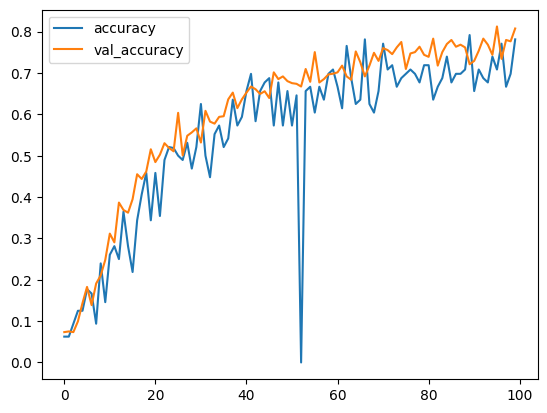

In [21]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

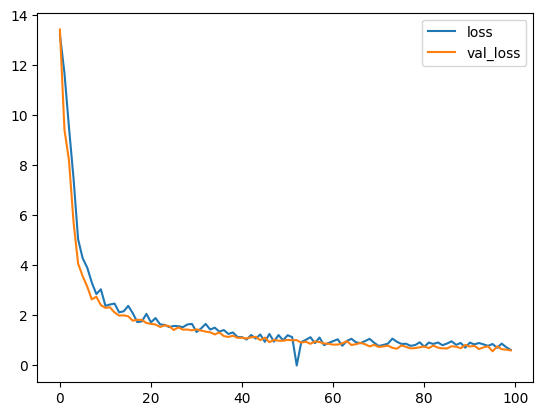

In [22]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()